# Deep Neural Network

In [1]:
import numpy as np
import pandas as pd 
from matplotlib import style
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime

style.use("ggplot")

%matplotlib inline

In [2]:
df = pd.read_csv("./data/penguins.csv").dropna()

In [3]:
df.columns

Index(['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass', 'Species'], dtype='object')

In [4]:
df = pd.concat([df,df,df,df]).reset_index()

In [5]:
X_pre = df[['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']].values
y = df['Species'].values

In [6]:
species_map = {
    0 : "Adelie",
    1 : "Gentoo",
    2 : "Chinstrap"
}

In [7]:
(
    X_pre.shape,
    y.shape
)

((1368, 4), (1368,))

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = StandardScaler().fit_transform(X_pre)

## Tensorflow

In [9]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import (models, utils, optimizers)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
tensorflow.random.set_seed(0)

In [11]:
%load_ext tensorboard

In [12]:
y = utils.to_categorical(y)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [14]:
m_samples ,n_features = X_train.shape
_ , n_classes = y_train.shape

In [15]:
hidden_layer_nodes = 10


model = Sequential()
model.add(
    Dense(
        units=hidden_layer_nodes,
        input_dim=n_features,
        activation='relu'
    )
)

model.add(
    Dense(
        units=hidden_layer_nodes,
        input_dim=hidden_layer_nodes,
        activation='relu'
    )
)

model.add(
    Dense(
        units=n_classes,
        input_dim=hidden_layer_nodes,
        activation='softmax'
    )
)

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tensorflow.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=250,
    validation_data=(X_test,y_test),
    callbacks=[tensorboard_callback],
    verbose=0
)

In [17]:
%tensorboard --logdir logs/fit

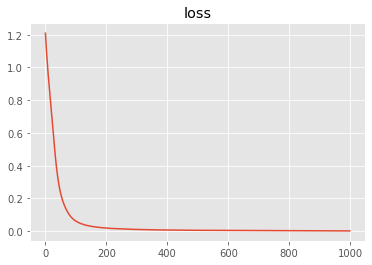

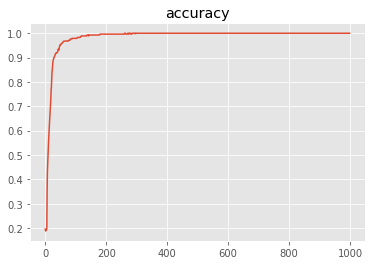

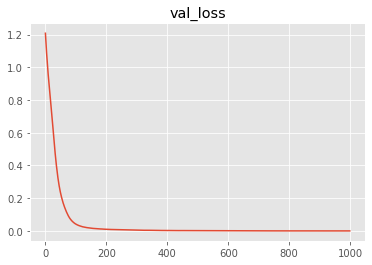

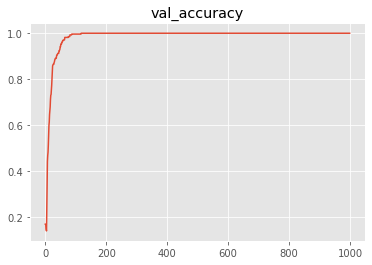

In [16]:
model_history = history.history

for i in model_history:
    plt.plot(model_history[i])
    plt.title(i)
    plt.show()

In [17]:
for layer in model.layers:
    weight, bias = layer.get_weights()
    print(weight.shape,bias.shape)

(4, 10) (10,)
(10, 10) (10,)
(10, 3) (3,)


In [18]:
X_train @ model.layers[0].get_weights()[0] + model.layers[0].get_weights()[1]

array([[-2.44288976, -1.70451166, -0.59092405, ...,  0.46755919,
        -0.1936814 , -2.68844886],
       [ 1.67734874,  1.84914908,  0.12182985, ...,  0.2216184 ,
         0.02852413,  0.23671464],
       [ 1.56029823,  1.37741084,  0.07015217, ..., -1.10576873,
        -1.30871289,  1.48845342],
       ...,
       [-1.74322733, -1.18094705, -0.320985  , ...,  1.26393097,
         0.4388508 , -1.83092742],
       [-1.79245342, -1.96315892,  0.21406959, ...,  0.09678957,
        -0.79704725, -0.95360562],
       [ 3.10695803,  3.0183565 ,  0.42593061, ...,  0.16358388,
         0.09470334,  1.37489172]])

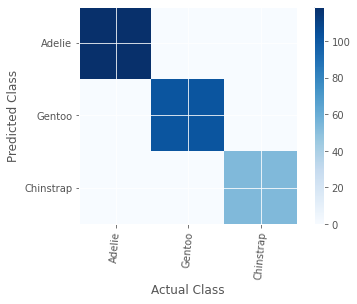

In [19]:
from sklearn.metrics import confusion_matrix


class_probabilities = model.predict(X_test)
predictions = np.argmax(class_probabilities, axis=1) # returns index of maximum value
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(species_map))
plt.xticks(tick_marks, species_map.values(), rotation=85)
plt.yticks(tick_marks, species_map.values())
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()
